In [1]:
import os
if os.getcwd().split("/")[-1] != 'BENDR-XAI': os.chdir("../")

import mne
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from matplotlib import animation
import matplotlib.cm as cm
import sys
from tqdm import tqdm

## Test

In [2]:
edf_file_path = 'notebooks/S001R10.edf'

/home/andersgm/anaconda3/envs/XAI/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


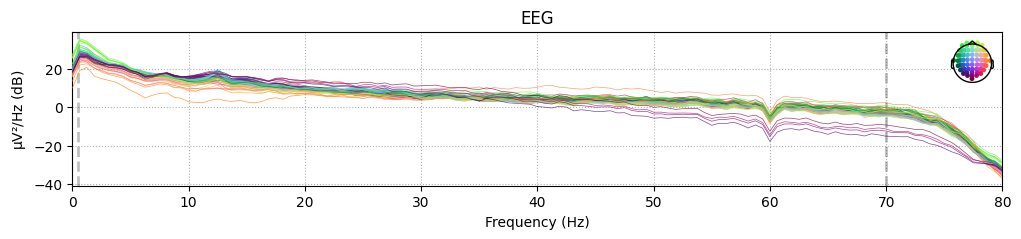

In [3]:
subjects_dir, subject, trans, src_path, bem_path = get_fsaverage()
raw = get_raw(edf_file_path)

fig, ax = plt.subplots(1, 1, figsize=(12, 2))
raw.compute_psd(verbose = False).plot(axes = ax)
plt.show()

In [4]:
src = get_src(src_path)
fwd = get_fwd(raw.info, trans, src_path, bem_path)
cov = get_cov(raw)
stc = get_stc(raw, fwd, cov, tmin=2, tmax=4)

In [5]:
parcellation_name = "aparc_sub" #HCPMMP1
labels = get_labels(subjects_dir, parcellation_name)

In [6]:
vertices = get_vertices(src)
tris_vertices = get_vertices_tris(src)

sources = get_sources(src)
tris_sources = get_sources_tris(src)

In [8]:
activity = [np.linspace(0, 1, len(labels[0])), np.linspace(0, 1, len(labels[1]))]
values = activity_to_source_values(activity, labels, sources)
tris_values = vertex_values_to_tris_values(tris_sources, values, func=np.max)
tris_colors = cm.tab20(tris_values)

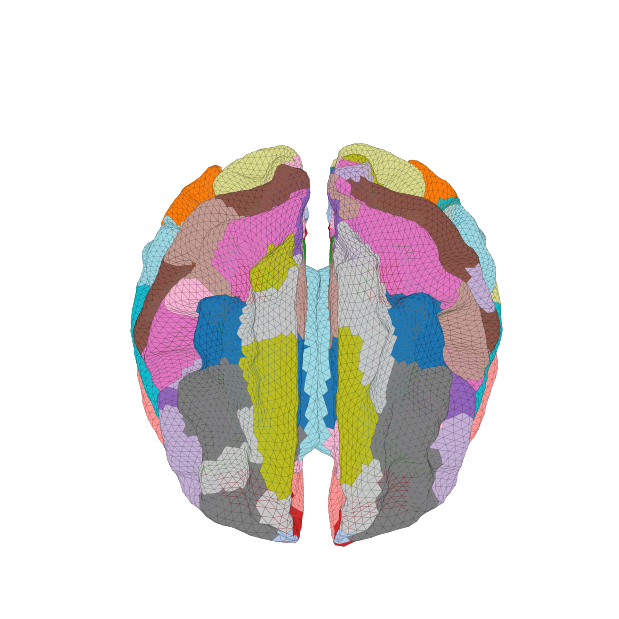

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i in range(2):
    mesh = ax.plot_trisurf(*sources[i].T, triangles=tris_sources[i], linewidth=0.1, shade=False,
                            antialiased=True, edgecolor=(0,0,0,0.5))

    mesh.set_facecolors(tris_colors[i])

ax.set_xlim(-0.06, 0.06)
ax.set_ylim(-0.08, 0.04)
ax.set_zlim(-0.04, 0.09)
ax.set_box_aspect([1,1,1])
ax.view_init(45, 90)
ax.axis("off")
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.show()

In [11]:
activity = get_power_per_label(stc, labels)
values = activity_to_source_values(activity, labels, sources)
tris_values = vertex_values_to_tris_values(tris_sources, values)

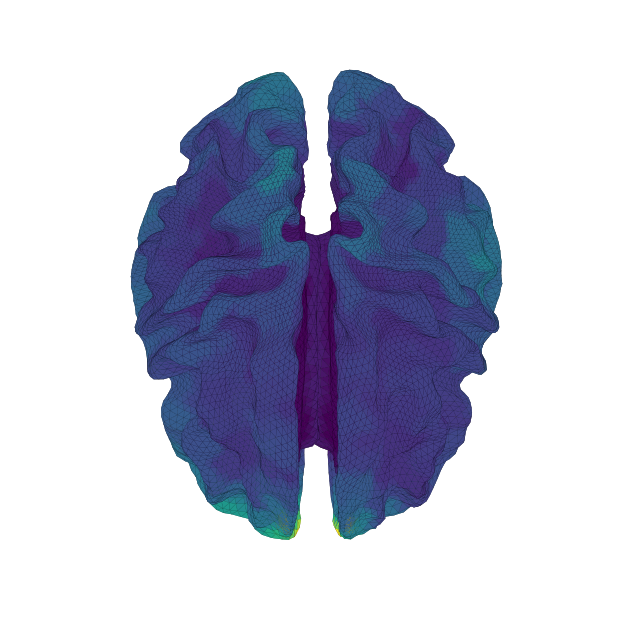

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i in range(2):
    mesh = ax.plot_trisurf(*sources[i].T, triangles=tris_sources[i], linewidth=0.1, shade=False,
                            antialiased=True, edgecolor=(0,0,0,0.5), cmap="viridis")

    mesh.set_array(tris_values[i])
    #mesh.set_facecolors(tris_colors[i])

ax.set_xlim(-0.06, 0.06)
ax.set_ylim(-0.08, 0.04)
ax.set_zlim(-0.04, 0.09)
ax.set_box_aspect([1,1,1])
ax.view_init(90, 90)
ax.axis("off")
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
#fig.colorbar(cm.ScalarMappable(cmap='viridis'))

plt.show()